# 2. 
##    2.1) “images/png/printedtext.png” görüntüsündeki kararmanın giderilmesi için herhangi birgörüntü iyileştirme tekniği 
* ### lineer dönüşüm, 
* ### gamma veya log dönüşümü, 
* ### yerel veya genel histogram eşitleme
## deneyip ikinci bir görüntü elde ediniz. 
##    2.2) İlk ve ikinci görüntünün histogramlarını bastırıp analiz ediniz. 
##    2.3) İyileştirilmiş görüntüde uygun bir eşik değeri belirleyip görüntüyü bölütleyiniz. 
##    2.4) Uyguladığınız iyileştirme yaklaşımının harfleri arka plandan ayırmada ne derece etkin olduğunu değerlendiriniz.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2.1) “images/png/printedtext.png” görüntüsündeki kararmanın giderilmesi için herhangi birgörüntü iyileştirme tekniği 
* ### lineer dönüşüm, 
* ### gamma veya log dönüşümü, 
* ### yerel veya genel histogram eşitleme

Image type:  <class 'numpy.ndarray'> Image Dimensions :  (918, 1632, 3)


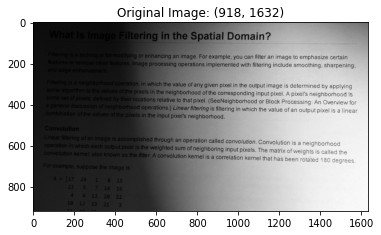

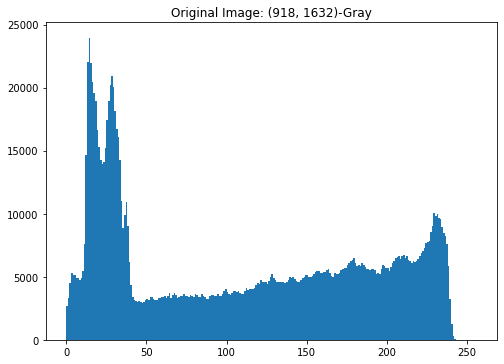

In [14]:
img_org = cv2.imread('../images/png/printedtext.png')
if img_org is not None:
    print('Image type: ', type(img_org),
      'Image Dimensions : ', img_org.shape)
else:
    raise Exception('Image not found')

img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY) # bgr 2 rgb
plt.imshow(img_org, cmap='gray')
plt.title(f'Original Image: {img_org.shape}')
show_hist(img_org, title=f'Original Image: {img_org.shape}', cumulative=False, bins=256)
plt.show()

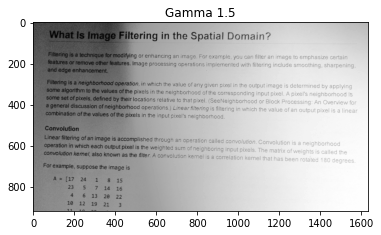

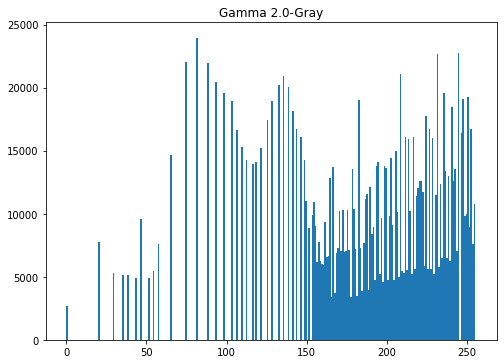

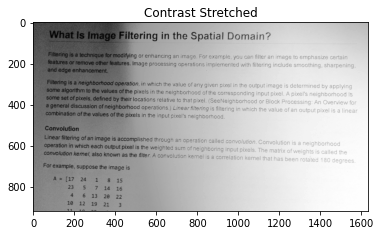

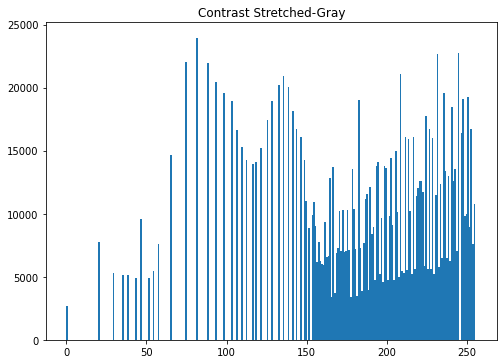

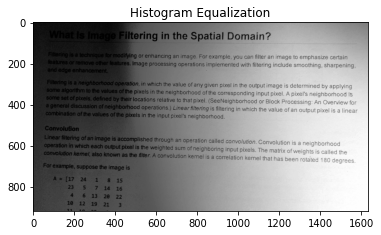

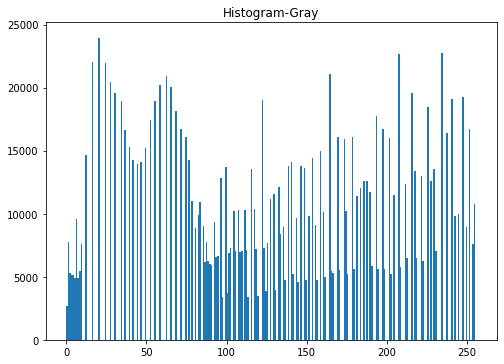

In [22]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return np.take(table, image)

img = adjust_gamma(img, 1.5)
plt.imshow(img, cmap='gray')
plt.title('Gamma 1.5')
show_hist(img, title='Gamma 2.0')
plt.show()


# Contrast stretching
def contrast_stretch(img):
    out = (img-img.min())/(img.max()-img.min())
    return ((out) * 255).astype(np.uint8) 

img = contrast_stretch(img)
plt.imshow(img, cmap='gray')
plt.title('Contrast Stretched')
show_hist(img, title='Contrast Stretched', cumulative=False)
plt.show()


# Histogram Equalization
#https://levelup.gitconnected.com/introduction-to-histogram-equalization-for-digital-image-enhancement-420696db9e43
def hist_equalization(img_array):
    
    # STEP 1: Normalized cumulative histogram
    
    #flatten image array and calculate histogram via binning
    histogram_array = np.bincount(img_array.flatten(), minlength=256)
    #normalize
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels
    #cumulative histogram
    chistogram_array = np.cumsum(histogram_array)

    # STEP 2: Pixel mapping lookup table    
    transform_map = np.floor(255 * chistogram_array).astype(np.uint8)


    # STEP 3: Transformation
    eq_img_array = np.take(transform_map, img_array)
    return eq_img_array

img = hist_equalization(img)
plt.imshow(img, cmap="gray")
plt.title('Histogram Equalization')
show_hist(img, cumulative=False, bins=256)
plt.show()

## Gaussian blur
img = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(img, cmap='gray')

##    2.2) İlk ve ikinci görüntünün histogramlarını bastırıp analiz ediniz. 

##    2.3) İyileştirilmiş görüntüde uygun bir eşik değeri belirleyip görüntüyü bölütleyiniz. 


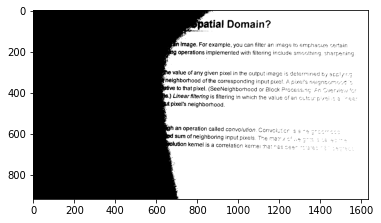

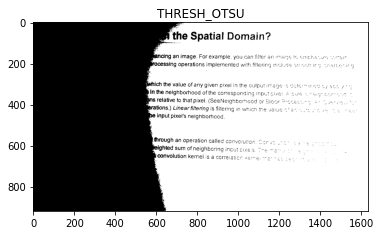

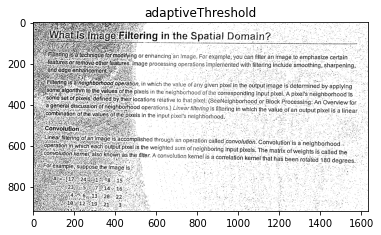

In [12]:
## Thresholding
# TODO: Otsu thresholding  
def threshold_img(img, method="mean"):
    if isinstance(method, int):
        th_value = method
    elif method == "mean":
        th_value = img.mean()
    elif method == "median":
        th_value = np.median(img)
    
    return (img > th_value)*255

img_th = threshold_img(img, method="mean")
plt.imshow(img_th, cmap='gray')
plt.show()

th , img_th = cv2.threshold(img, thresh=0, maxval= 255, type=cv2.THRESH_OTSU)
plt.imshow(img_th, cmap='gray')
plt.title('THRESH_OTSU')
plt.show()

img_th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) #imgf contains Binary image
plt.title('adaptiveThreshold')
plt.imshow(img_th, cmap='gray')

##    2.4) Uyguladığınız iyileştirme yaklaşımının harfleri arka plandan ayırmada ne derece etkin olduğunu değerlendiriniz.